In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('../input/voicegender/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

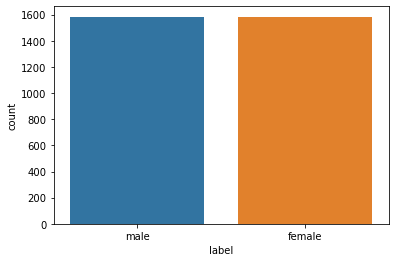

In [6]:
sns.countplot(df['label'])

In [7]:
df.head().T

,0,1,2,3,4
meanfreq,0.059781,0.0660087,0.0773155,0.151228,0.13512
sd,0.0642413,0.06731,0.0838294,0.0721106,0.0791461
median,0.0320269,0.0402287,0.0367185,0.158011,0.124656
Q25,0.0150715,0.0194139,0.00870106,0.0965817,0.0787202
Q75,0.0901934,0.0926662,0.131908,0.207955,0.206045
IQR,0.075122,0.0732523,0.123207,0.111374,0.127325
skew,12.8635,22.4233,30.7572,1.23283,1.10117
kurt,274.403,634.614,1024.93,4.1773,4.33371
sp.ent,0.893369,0.892193,0.846389,0.963322,0.971955
sfm,0.491918,0.513724,0.478905,0.727232,0.783568


In [8]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

In [9]:
df.head().T

,0,1,2,3,4
meanfreq,0.059781,0.066009,0.077316,0.151228,0.135120
sd,0.064241,0.067310,0.083829,0.072111,0.079146
median,0.032027,0.040229,0.036718,0.158011,0.124656
Q25,0.015071,0.019414,0.008701,0.096582,0.078720
Q75,0.090193,0.092666,0.131908,0.207955,0.206045
IQR,0.075122,0.073252,0.123207,0.111374,0.127325
skew,12.863462,22.423285,30.757155,1.232831,1.101174
kurt,274.402906,634.613855,1024.927705,4.177296,4.333713
sp.ent,0.893369,0.892193,0.846389,0.963322,0.971955
sfm,0.491918,0.513724,0.478905,0.727232,0.783568


In [10]:
x = df.drop('label',axis = 1)
y = df['label']

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## RandomForest

In [13]:
model = RandomForestClassifier(n_estimators = 200,random_state = 42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [14]:
model.score(x_test,y_test)

0.9810725552050473

In [15]:
y_preds = model.predict(x_test)

In [16]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       309
           1       0.99      0.98      0.98       325

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



In [17]:
con_mat = confusion_matrix(y_test,y_preds)
con_mat

array([[305,   4],
       [  8, 317]])

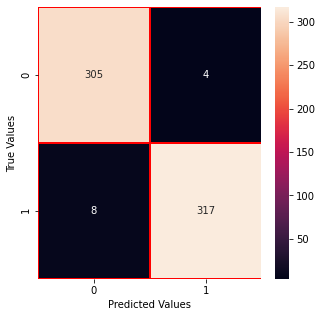

In [18]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(con_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

## SVC

In [19]:
svc_model = SVC()
svc_model.fit(x_train,y_train)

SVC()

In [20]:
svc_model.score(x_test,y_test)

0.9858044164037855

In [21]:
y_pred = svc_model.predict(x_test)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       309
           1       0.99      0.98      0.99       325

    accuracy                           0.99       634
   macro avg       0.99      0.99      0.99       634
weighted avg       0.99      0.99      0.99       634



In [23]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[305,   4],
       [  5, 320]])

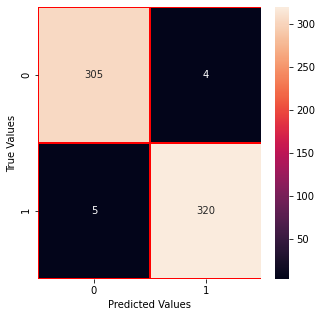

In [24]:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()